In [1]:
%load_ext autoreload
%autoreload 2

# Environment prep for Colab
 - download git repo 
 - install required pip packages

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!git clone https://github.com/kkahloots/Rethinking_Data_Effeient_GANs.git

In [4]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
#!wget https://hanlab.mit.edu/projects/data-efficient-gans/datasets/AnimalFace-cat.zip 

In [6]:
#!mkdir  Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat
#!mkdir  "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [7]:
#!unzip ./AnimalFace-cat.zip -d "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [8]:
#!rm -rf ./AnimalFace-cat.zip

# Connect Drive to save and restore results

# Settings

In [9]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
print(sep_local)

env: TF_KERAS=1
\


In [10]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [11]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
os.getcwd()

'C:\\Users\\Kriple\\PycharmProjects\\pythonProject\\Rethinking_Data_Effeient_GANs\\notebooks\\AugmentationDemo'

In [13]:
os.chdir('../../')
print(os.getcwd())

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs


# only on colab

# Dataset loading

In [14]:
#!pip install -q colorlog tqdm Augmentor livelossplot

In [15]:
from generators.from_images.file_image_generator import get_generators, create_image_lists

In [16]:
dataset_name='100-shot-obama'
inputs_shape= image_shape=(256, 256, 3)
batch_size = 36
latents_dim = 256
intermediate_dim = 50
img_dir = f'data/.{dataset_name}'

In [17]:
restore_path = f'./saved_models/{dataset_name}'

In [18]:
from pathlib import Path
Path(restore_path).mkdir(parents=True, exist_ok=True)

In [19]:
import pickle

In [20]:
try:
    imgs_list = pickle.load(open(f'{restore_path}/{dataset_name}_images_list.pkl', 'rb'))
except:
    imgs_list = create_image_lists(
    image_dir=img_dir, 
    validation_pct=0, 
    valid_imgae_formats='jpg')
    pickle.dump(imgs_list, open(f'{restore_path}/{dataset_name}_images_list.pkl', 'wb'))


In [21]:
train_generator, val_generator = get_generators(
        images_list=imgs_list, 
        image_shape=image_shape, 
        image_dir=img_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode=None
        )

  INFO     | Found 100 training files
  INFO     | Found 0 validation files


In [22]:
from utils.utils import img_merge
from PIL import Image
import numpy as np

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\utils\utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
#Image.fromarray(image_grid)

In [115]:
from augmentation.augmentor import Augmentor
from tqdm.notebook import tqdm 
augmentor = Augmentor()

In [116]:
batch = next(train_generator)

In [117]:
for i in tqdm(range(100)):

    aug_batch = augmentor.augment(batch, batch_shape= [batch_size, *image_shape],print_fn=True, scale=1.0)
    #print(aug_batch[1])
    #aug_batch = aug_batch[0]
    aug_batch = img_merge(aug_batch.numpy(), n_rows=6).squeeze() 
    aug_batch = Image.fromarray(aug_batch)
    aug_batch.save( f"./notebooks/AugmentationDemo/{dataset_name}/{i}.jpg", "JPEG")

['c']
['distort', 'c', 'random_brightness']
['c', 'shear_left_down']
['cutout', 'c', 'random_brightness']
['cutout', 'rand_shift']
['flip_left_right']
['c', 'shear_right']
['cutout']
['patch', 'c', 'tilt_random']


['rotate', 'flip_left_right', 'color_space_transform']
['rand_shift', 'patch']


['rand_shift', 'color_space_transform', 'distort']
['color_space_transform']
['random_saturation', 'rand_shift', 'tilt_left_random']
['rotate', 'cutout']
['rotate', 'color_space_transform']
['random_brightness', 'color_space_transform', 'cutout']
['distort', 'shear_right_down', 'patch']


['random_brightness', 'color_space_transform']
['rotate']
['color_space_transform', 'flip_left_right']
['shear_left', 'c', 'color_space_transform']
['c', 'shear_left_up']
['rand_shift', 'tilt_up_down_random', 'flip_left_right']


['patch']


['color_space_transform', 'c']
['rand_shift', 'c']
['tilt_random', 'cutout', 'c']
['c', 'c', 'flip_left_right']
['rand_shift']
['random_brightness', 'cutout', 'color_space_transform']
['rand_shift']
['cutout']
['random_saturation', 'c', 'rand_shift']
['color_space_transform', 'cutout']
['c']
['c']
['rotate', 'patch', 'random_contrast']


['distort']
['distort', 'color_space_transform']
['random_brightness', 'rotate']
['color_space_transform', 'c', 'skew_left_right_reflect']
['c']
['patch', 'c']


['rand_shift']
['cutout', 'rand_shift', 'flip_left_right']
['shear_left', 'color_space_transform', 'c']
['rotate', 'c']
['cutout', 'rotate', 'random_saturation']
['c', 'cutout']
['shear_left']
['random_brightness', 'color_space_transform']
['color_space_transform']
['c', 'color_space_transform']
['flip_left_right']
['tilt_up_down_random', 'color_space_transform', 'random_contrast']
['flip_left_right', 'color_space_transform', 'tilt_random']
['flip_left_right', 'distort']


['skew_top_down_repaint']
['c', 'flip_left_right', 'random_brightness']
['color_space_transform']
['distort', 'skew_left_right_repaint']
['flip_left_right', 'rotate']
['c', 'c']
['c', 'random_saturation', 'rand_shift']
['c']
['cutout', 'random_contrast']
['color_space_transform']
['color_space_transform']
['rotate', 'c', 'c']
['distort']
['random_brightness', 'flip_left_right']
['rotate']
['shear_down_right', 'rotate']
['rand_shift', 'distort']
['random_contrast']
['random_brightness', 'color_space_transform', 'cutout']
['cutout', 'rotate']
['shear_right', 'random_brightness']
['distort', 'random_brightness', 'rotate']
['random_brightness', 'flip_left_right']
['skew_top_down_repaint', 'rand_shift']
['c']
['random_contrast', 'distort']
['color_space_transform', 'cutout']
['tilt_left_up_down_random']
['patch', 'color_space_transform', 'tilt_up_down_random']


['color_space_transform']
['c']
['rotate', 'cutout']
['rotate', 'patch', 'c']


['flip_left_right']
['distort']
['flip_left_right', 'distort', 'patch']


['distort', 'rand_shift']
['color_space_transform', 'skew_left_right_reflect']
['rotate', 'flip_left_right', 'color_space_transform']
['distort']
['c']
['c', 'rand_shift']
['rand_shift']
['shear_down_left', 'rotate', 'color_space_transform']


['rotate', 'random_saturation']
['random_contrast', 'rand_shift']
['c', 'color_space_transform', 'distort']
['rotate', 'shear_left_up']
['cutout', 'flip_left_right', 'skew_left_right_reflect']
['cutout']
['color_space_transform', 'rand_shift', 'rotate']
['c']
['c', 'rotate', 'distort']
['c', 'rotate']
['shear_right_down', 'flip_left_right', 'random_brightness']
['skew_left_right_reflect', 'c']
['shear_right_down']
['cutout']
['color_space_transform']
['c']
['flip_left_right', 'random_contrast', 'c']
['random_saturation', 'rotate', 'flip_left_right']
['color_space_transform', 'rand_shift', 'random_saturation']
['tilt_left_random', 'flip_left_right']
['flip_left_right']
['rotate', 'flip_left_right']
['tilt_left_up_down_random', 'c']
['c', 'flip_left_right']
['c']
['cutout', 'c', 'c']
['rotate', 'random_brightness', 'distort']
['random_saturation', 'color_space_transform', 'cutout']
['distort', 'tilt_left_random', 'rand_shift']
['rand_shift', 'c']
['random_contrast']
['random_brightness',

['rand_shift']
['flip_left_right', 'rand_shift', 'color_space_transform']
['c', 'rotate']
['patch', 'c']


['color_space_transform', 'c']
['flip_left_right']
['distort', 'flip_left_right', 'rotate']
['distort']
['c']
['distort', 'c', 'tilt_up_down_random']
['flip_left_right', 'c']
['rand_shift']
['rotate', 'rand_shift']
['tilt_left_random']
['flip_left_right', 'c', 'c']
['rotate']
['rand_shift', 'distort', 'color_space_transform']
['rotate', 'rand_shift', 'distort']
['color_space_transform']
['c']
['random_saturation']
['patch']


['rand_shift', 'shear_left']
['rotate', 'skew_left_right_repaint']
['distort', 'c']
['flip_left_right']
['skew_top_down_repaint']
['skew_left_right_reflect', 'rand_shift']
['distort', 'cutout', 'rand_shift']
['tilt_random', 'rotate']
['rotate']
['c', 'distort', 'flip_left_right']
['rotate', 'shear_down_left']
['c']
['c', 'rotate', 'cutout']
['c', 'distort', 'rand_shift']
['color_space_transform', 'c']
['distort', 'color_space_transform']
['rand_shift', 'c', 'random_brightness']
['c']
['color_space_transform', 'rand_shift', 'rotate']
['color_space_transform', 'tilt_left_up_down_random', 'distort']
['c', 'skew_top_down_reflect']
['shear_down_left', 'random_contrast']
['flip_left_right', 'distort']
['rotate', 'tilt_left_random', 'color_space_transform']
['random_brightness', 'flip_left_right', 'c']
['c', 'random_saturation', 'flip_left_right']
['c']
['rand_shift', 'rotate', 'c']
['distort', 'color_space_transform']
['random_contrast', 'distort']
['shear_left', 'cutout']
['color_space_tran

['distort', 'flip_left_right', 'tilt_left_up_down_random']
['rotate', 'flip_left_right']
['rotate', 'random_saturation']
['shear_right_down', 'c', 'distort']
['c', 'cutout', 'random_saturation']
['patch']


['shear_right_down', 'c', 'rotate']
['random_contrast', 'rand_shift', 'c']
['skew_left_right_repaint']
['c', 'random_brightness']
['flip_left_right']
['c', 'color_space_transform', 'flip_left_right']
['c']
['random_brightness']
['distort']
['c', 'tilt_left_random', 'c']
['tilt_left_random', 'c', 'distort']
['rand_shift']
['random_contrast', 'c']
['random_brightness', 'rand_shift', 'c']
['tilt_random', 'c', 'distort']
['rotate', 'distort']
['flip_left_right', 'distort']
['random_brightness', 'rand_shift', 'skew_left_right_reflect']
['flip_left_right']
['rotate', 'distort']
['skew_left_right_repaint', 'random_saturation', 'c']
['c', 'rotate', 'distort']
['random_brightness', 'color_space_transform', 'patch']


['color_space_transform', 'shear_right', 'cutout']
['color_space_transform', 'distort']
['random_brightness', 'c']
['tilt_left_random', 'distort']
['distort', 'skew_left_right_reflect']
['flip_left_right', 'rand_shift', 'c']
['random_contrast']
['random_contrast', 'distort']
['patch', 'rand_shift', 'shear_right_down']


['cutout', 'rand_shift']
['c', 'shear_left_up', 'flip_left_right']
['rand_shift', 'skew_left_right_repaint', 'distort']
['cutout', 'c']
['color_space_transform', 'flip_left_right']
['color_space_transform', 'c', 'rotate']
['shear_left_up', 'random_saturation']
['c']
['skew_left_right_repaint']
['color_space_transform', 'random_contrast']
['c', 'color_space_transform', 'rand_shift']
['skew_left_right_reflect']
['c', 'c']
['c', 'random_contrast', 'skew_left_right_reflect']
['rand_shift']
['rotate', 'c', 'rand_shift']
['color_space_transform', 'flip_left_right']
['cutout', 'color_space_transform']
['random_saturation', 'rand_shift']
['rand_shift', 'c', 'cutout']
['patch', 'c', 'rotate']


['rotate']
['tilt_left_random', 'rotate', 'c']
['c']
['color_space_transform', 'c', 'shear_left_up']
['rotate']
['shear_left_up', 'distort']
['c']
['patch']


['c']
['flip_left_right', 'distort']
['cutout', 'random_saturation', 'tilt_left_random']
['flip_left_right', 'patch', 'c']


['shear_left', 'cutout']
['distort', 'flip_left_right']
['color_space_transform', 'random_brightness']
['rotate']
['shear_left_up']
['rotate', 'rand_shift', 'c']
['c', 'c', 'color_space_transform']
['c', 'rand_shift', 'c']
['c', 'rand_shift']
['c']
['tilt_left_up_down_random', 'c', 'rotate']
['tilt_random', 'color_space_transform']
['distort', 'rand_shift']
['shear_right', 'rand_shift']
['rotate', 'color_space_transform', 'flip_left_right']
['shear_down_right', 'random_contrast', 'rotate']
['c', 'color_space_transform']
['random_saturation']
['cutout']
['random_brightness']
['random_saturation', 'rotate']
['color_space_transform']
['c']
['shear_down_right', 'rotate', 'distort']
['c', 'color_space_transform', 'shear_right']
['color_space_transform', 'flip_left_right']
['c', 'random_saturation']
['rand_shift', 'shear_left', 'color_space_transform']
['cutout']
['patch', 'skew_top_down_reflect']


['rotate', 'c']
['random_brightness', 'flip_left_right', 'skew_top_down_repaint']
['rand_shift', 'c']
['rand_shift', 'c']
['color_space_transform']
['flip_left_right', 'random_saturation']
['distort']
['flip_left_right']
['c', 'rand_shift']
['rand_shift', 'shear_right_up', 'color_space_transform']
['c', 'rotate', 'flip_left_right']
['distort']
['random_contrast', 'flip_left_right', 'distort']
['c', 'rand_shift', 'patch']


['c', 'color_space_transform']
['flip_left_right', 'distort']
['c', 'distort']
['c', 'skew_top_down_reflect', 'rand_shift']
['c', 'random_brightness', 'flip_left_right']
['c', 'rand_shift']
['flip_left_right']
['shear_left_down', 'rotate', 'random_brightness']
['random_brightness']
['skew_top_down_reflect']
['color_space_transform', 'c', 'flip_left_right']
['rand_shift']
['flip_left_right']
['c', 'rand_shift', 'cutout']
['shear_right_up', 'c']
['patch', 'c', 'distort']


['color_space_transform', 'rotate']
['patch']


['skew_top_down_repaint', 'flip_left_right']
['distort', 'c', 'c']
['skew_top_down_repaint', 'rotate', 'distort']
['rand_shift', 'flip_left_right']
['rand_shift', 'c']
['flip_left_right', 'random_contrast']
['c']
['c']
['rotate']
['distort', 'color_space_transform']
['distort']
['flip_left_right', 'c', 'color_space_transform']
['shear_down_right', 'distort', 'random_contrast']
['c']
['cutout']
['color_space_transform', 'c', 'rand_shift']
['distort', 'random_contrast']
['c', 'random_contrast']
['rand_shift']
['rotate', 'shear_left_down', 'patch']


['color_space_transform', 'distort', 'patch']


['cutout', 'c']
['shear_right_down']
['c']
['color_space_transform', 'rand_shift']
['shear_left_up', 'cutout']
['shear_down_right']
['cutout', 'skew_left_right_repaint']
['patch', 'random_brightness']


['random_contrast', 'color_space_transform']
['flip_left_right', 'c']
['c']
['color_space_transform']
['rotate', 'distort']
['distort']
['cutout', 'rotate', 'c']
['c']
['flip_left_right']
['flip_left_right']
['distort']
['random_contrast', 'cutout']
['flip_left_right', 'random_brightness', 'shear_right_down']
['c', 'skew_top_down_repaint']
['color_space_transform', 'c', 'skew_top_down_reflect']
['c']
['distort', 'rotate']
['c', 'color_space_transform', 'random_contrast']
['flip_left_right', 'random_brightness']
['c', 'color_space_transform']
['random_contrast']
['color_space_transform', 'shear_left_up', 'rand_shift']
['rand_shift']
['color_space_transform', 'c', 'c']
['distort']
['rand_shift', 'patch']


['flip_left_right']
['patch', 'c']


['color_space_transform']
['tilt_left_up_down_random', 'random_saturation', 'rand_shift']
['c', 'patch', 'color_space_transform']


['cutout', 'c']
['flip_left_right', 'color_space_transform']
['c', 'rotate']
['c', 'c', 'flip_left_right']
['c']
['rand_shift', 'skew_top_down_reflect']
['c', 'color_space_transform', 'rand_shift']
['rand_shift', 'rotate', 'skew_top_down_reflect']
['c', 'random_contrast']
['c', 'random_contrast']
['skew_left_right_repaint']
['flip_left_right']
['color_space_transform']
['c', 'color_space_transform']
['c', 'rand_shift']
['rand_shift', 'random_contrast']
['flip_left_right', 'rand_shift', 'distort']
['distort', 'c', 'color_space_transform']
['c', 'rand_shift']
['rand_shift', 'random_brightness', 'rotate']
['rand_shift', 'c', 'distort']
['patch', 'color_space_transform']


['rand_shift']
['tilt_left_random', 'c']
['rand_shift']
['c', 'c']
['cutout', 'rand_shift']
['cutout']
['distort', 'skew_left_right_repaint', 'color_space_transform']
['distort', 'color_space_transform', 'patch']


['distort']
['rotate']
['rand_shift', 'c', 'color_space_transform']
['rotate']
['shear_left']
['random_saturation', 'patch', 'rand_shift']


['rotate', 'tilt_left_random', 'c']
['c']
['rotate', 'patch']


['c']
['c', 'c', 'rand_shift']
['random_contrast', 'patch']


['c', 'rand_shift', 'rotate']
['patch', 'rotate']


['cutout']
['distort', 'random_contrast']
['color_space_transform', 'flip_left_right', 'c']
['color_space_transform', 'rand_shift']
['random_saturation', 'flip_left_right', 'c']
['random_brightness']
['color_space_transform']
['rotate', 'c']
['distort']
['flip_left_right', 'color_space_transform']
['color_space_transform', 'flip_left_right', 'random_contrast']
['rotate', 'color_space_transform']
['c', 'distort']
['shear_left_down', 'c', 'cutout']
['random_saturation']
['shear_down_right']
['c', 'random_saturation', 'cutout']
['c', 'flip_left_right']
['rotate', 'distort']
['flip_left_right', 'rotate', 'color_space_transform']
['distort', 'rand_shift']
['c']
['c', 'color_space_transform', 'distort']
['distort']
['patch']


['c']
['rand_shift', 'skew_left_right_repaint', 'distort']
['c', 'color_space_transform']
['rotate', 'rand_shift', 'flip_left_right']
['random_saturation', 'rand_shift']
['patch', 'c']


['distort', 'c', 'random_saturation']
['random_saturation', 'distort', 'rotate']
['c', 'c']
['rand_shift', 'c']
['random_brightness', 'color_space_transform']
['flip_left_right']
['c', 'color_space_transform', 'c']
['random_brightness']
['c']
['random_contrast']
['c', 'flip_left_right']
['c']
['c', 'color_space_transform']
['cutout', 'rotate']
['rand_shift', 'c', 'color_space_transform']
['distort']
['distort']
['distort', 'patch', 'rotate']


['tilt_up_down_random', 'c', 'patch']


['distort', 'c', 'rotate']
['c', 'random_saturation', 'distort']
['rotate', 'c']
['random_brightness', 'tilt_up_down_random']
['rand_shift']
['color_space_transform', 'distort', 'rotate']
['rotate']
['color_space_transform', 'random_contrast', 'rotate']
['flip_left_right']
['random_saturation', 'rotate']
['c', 'rand_shift', 'distort']
['rand_shift', 'shear_right_down']
['c', 'rotate', 'rand_shift']
['c']
['random_saturation', 'patch']


['rand_shift']
['cutout', 'distort']
['random_brightness']
['color_space_transform', 'flip_left_right', 'random_brightness']
['color_space_transform', 'random_contrast']
['color_space_transform']
['rand_shift']
['distort', 'c']
['rand_shift', 'rotate']
['rotate', 'c']
['flip_left_right', 'distort', 'rotate']
['color_space_transform']
['rand_shift']
['distort', 'color_space_transform', 'c']
['random_brightness', 'tilt_random']
['c', 'rotate', 'random_saturation']
['cutout', 'rotate', 'rand_shift']
['cutout', 'shear_right']
['color_space_transform', 'distort']
['patch', 'random_contrast']


['random_saturation', 'color_space_transform']
['cutout', 'c', 'distort']
['c', 'distort', 'rotate']
['tilt_random']
['random_brightness']
['c', 'c']
['random_contrast', 'patch', 'color_space_transform']


['c', 'rotate']
['c', 'c', 'flip_left_right']
['distort']
['rand_shift']
['skew_left_right_reflect']
['rand_shift', 'flip_left_right', 'shear_down_left']
['random_contrast', 'flip_left_right']
['rand_shift', 'flip_left_right', 'skew_left_right_repaint']
['distort', 'skew_left_right_reflect']
['skew_left_right_reflect', 'color_space_transform', 'c']
['rand_shift']
['tilt_up_down_random']
['c', 'c', 'rand_shift']
['skew_top_down_repaint', 'distort']
['c']
['c', 'patch', 'random_saturation']


['c']
['distort']
['rand_shift', 'skew_top_down_reflect', 'rotate']
['c', 'c', 'distort']
['random_brightness', 'rotate', 'distort']
['rotate', 'flip_left_right']
['cutout', 'color_space_transform']
['cutout', 'random_saturation', 'rotate']
['rand_shift']
['c']
['shear_left']
['random_contrast']
['c']
['random_brightness', 'flip_left_right', 'c']
['shear_left_up', 'patch', 'rand_shift']


['flip_left_right', 'skew_top_down_repaint']
['cutout', 'color_space_transform']
['random_saturation']
['flip_left_right', 'rotate', 'rand_shift']
['rand_shift', 'distort']
['flip_left_right', 'c', 'rand_shift']
['random_brightness', 'flip_left_right']
['color_space_transform', 'patch', 'distort']


['distort']
['c', 'patch']


['c']
['rotate', 'flip_left_right', 'random_contrast']
['c', 'skew_left_right_repaint']
['c', 'patch']


['distort']
['rand_shift', 'distort', 'tilt_left_random']
['random_brightness', 'color_space_transform']
['rand_shift']
['c', 'shear_left_up']
['shear_down_right', 'color_space_transform', 'c']
['patch']


['flip_left_right']
['distort', 'skew_left_right_repaint', 'random_saturation']
['color_space_transform']
['c']
['flip_left_right', 'color_space_transform']
['c', 'rand_shift', 'distort']
['random_saturation', 'flip_left_right']
['distort', 'shear_down_right']
['rotate', 'skew_top_down_reflect']
['patch', 'color_space_transform', 'c']


['rand_shift', 'cutout']
['shear_left', 'flip_left_right']
['c', 'flip_left_right']
['c', 'rand_shift', 'flip_left_right']
['rotate']
['patch', 'flip_left_right']


['rand_shift', 'c']
['rand_shift', 'random_saturation', 'color_space_transform']
['c', 'flip_left_right', 'patch']


['distort']
['color_space_transform', 'cutout', 'flip_left_right']
['flip_left_right', 'c']



In [83]:
tf.concat(aug_batch, 0).shape

TensorShape([36, 256, 256, 3])

In [75]:
aug_batch[1].shape

TensorShape([6, 256, 256, 3])

In [ ]:
# xxxx

In [119]:
from augmentation.Perspective import rand_shift, rotate

In [251]:
import cv2
import imutils
import random
import numpy as np
import tensorflow as tf


def rotate_ROI(images, **kwargs):
    
    def _py_rotate_roi(imgs):
        images = []
        for i in range(len(imgs)):
            image = cv2.cvtColor(imgs[i].numpy().astype(np.uint8), cv2.IMREAD_COLOR)
            bg = image.copy()
            bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
            bg = cv2.GaussianBlur(bg, (1, 1), 0)
            bg = cv2.Canny(bg, 150, 255, 0)

            cnts = cv2.findContours(bg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

            #ROIs = []
            #c  = random.choice(cnts[::-1])
            c  = cnts[::-1][0]
            x, y, w, h = cv2.boundingRect(c)
            approx = cv2.approxPolyDP(c, 0, True)
            #ROIs.append([x, y, w, h, approx])
            
            radius = image.shape[0]//5
            bg = image.copy()
            #x, y, w, h, approx in random.sample(ROIs, 1):
                
            mask = np.zeros(bg.shape[:2], np.uint8)
            cv2.drawContours(mask, [cv2.convexHull(approx)], -1, (255, 255, 255), -1, cv2.LINE_AA)
            obj = cv2.bitwise_and(image, image, mask=mask)

            ix = np.where(obj != 0)
            bg[ix] = 255

            mask = cv2.cvtColor(obj, cv2.COLOR_BGR2GRAY)
            bg = cv2.inpaint(bg, mask, radius, flags=cv2.INPAINT_TELEA)
              
            scale = (float(random.choice(kwargs['scales'])), float(random.choice(kwargs['scales'])))  # define your scale
            scaled_obj = cv2.resize(obj[y:y + h, x:x + w], None, fx=scale[0], fy=scale[1])  # scale image

            ix = np.where(scaled_obj == 255)
            scaled_obj[ix] = 0

            cv2.floodFill(scaled_obj, None, (0, 0), 0)
            kernel = np.ones((5, 5), np.uint8)
            scaled_obj = cv2.erode(scaled_obj, kernel, iterations=1)
            #scaled_obj = cv2.dilate(scaled_obj, kernel, iterations=1)

            sh, sw = scaled_obj.shape[:2]  # get h, w of scaled image
            padded_scaled = np.zeros(bg.shape, dtype=np.uint8)  # using img.shape to obtain #channels
            pw, ph, _ = padded_scaled[y:y + sh, x:x + sw].shape
            padded_scaled[y:y + sh, x:x + sw] = cv2.resize(scaled_obj, (ph, pw))

            kwargs['angles'] = np.clip(kwargs['angles'], -40, 40)

            bg = rotate(images=tf.expand_dims(bg, 0), **kwargs).numpy()[0]

            kwargs['angles'] = kwargs['angles'] - 5
            padded_scaled = rotate(images=tf.expand_dims(padded_scaled, 0), **kwargs).numpy()[0]
            
            
            ix = np.where(padded_scaled != 0)
            bg[ix] = padded_scaled[ix]
            images += [bg]  
                
        images =  np.array(images)  
        print(images.shape)    
        return images

    return tf.py_function(_py_rotate_roi, [images], tf.float32)

In [252]:
batch_size, width, height, ch = [batch_size, *image_shape]
kwargs = {'width': width,
          'height': height,
          'angles': random.randint(-35, 35),
          'scales':  [a / 100 for a in range(80, 121)] 
          }

cutbatch = rotate_ROI(images=batch, **kwargs)

(36, 256, 256, 3)


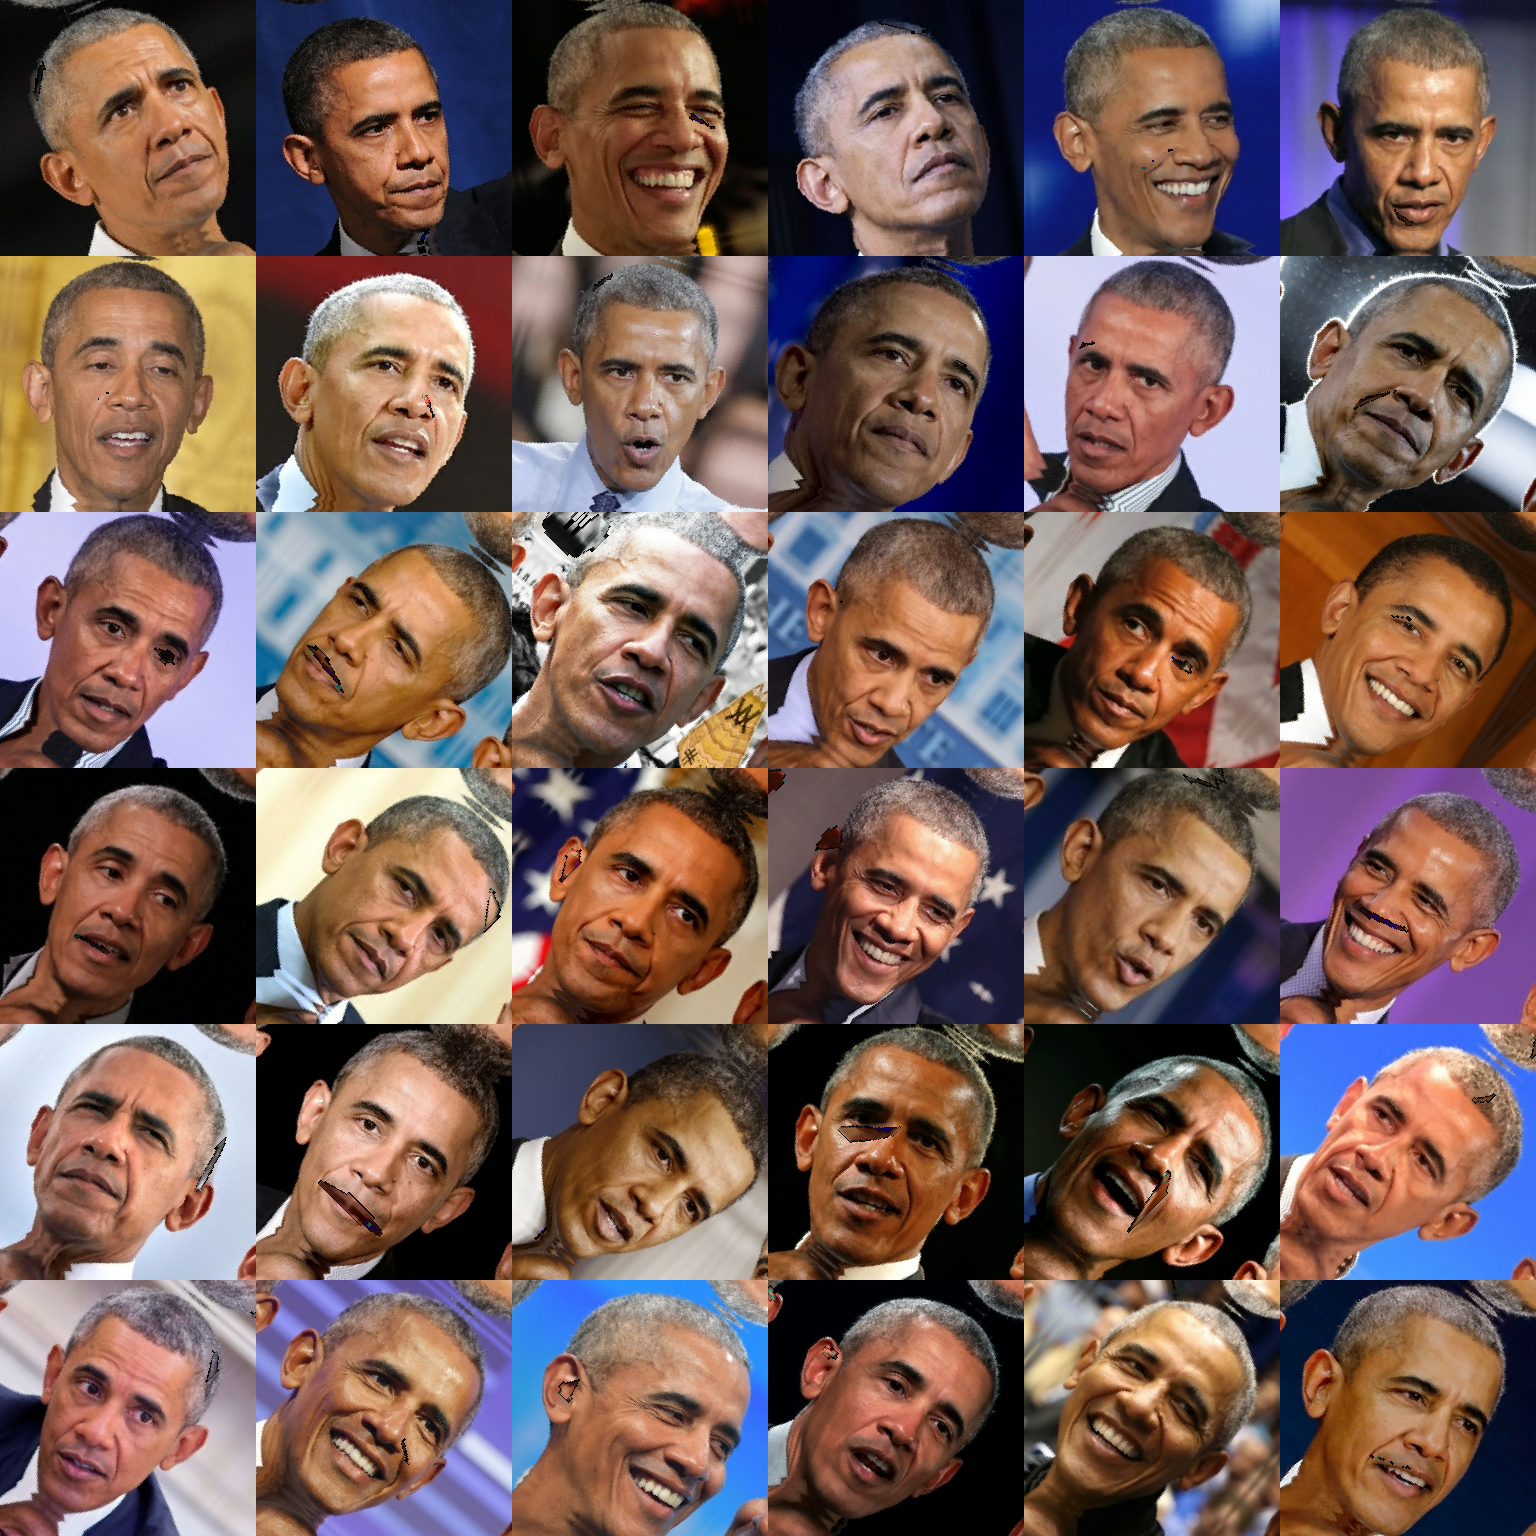

In [253]:
image_grid = img_merge(cutbatch.numpy(), n_rows=6).squeeze()
Image.fromarray(image_grid)

In [ ]:
#

In [ ]:
def aug_bg_patches(images, **kwargs):

    def _py_detect_patches(images):
        bgs = []
        for i in range(len(images)):
            image = images[i].numpy().astype(np.uint8)
            ROIs_sample = _sample_ROI(image)

            bg = _color_bg(image, image.copy(), ROIs_sample)
            bg = rotate(images=tf.expand_dims(bg, 0), **kwargs['kwargs']).numpy()[0]
            #bg = cv2.cvtColor(bg.astype(np.uint8), cv2.IMREAD_COLOR)
            #bg = _resize_place_ROIs(image, bg, ROIs_sample, kwargs['scale'])

            bgs += [bg]
        return np.array(bgs)

    augmented = tf.py_function(_py_detect_patches, [images], tf.float32)

    return augmented

In [126]:
cutbatch = rotate(images=batch, **kwargs)

In [ ]:
image_grid = img_merge(cutbatch.numpy(), n_rows=6).squeeze()
Image.fromarray(image_grid)

In [ ]:
def rotate_random(batch_shape):
    batch_size, width, height, ch = batch_shape
    kwargs = {'width': width,
              'height': height,
              'angles': random.randint(-35, 35)}
    return pres_aug.rotate, kwargs

In [ ]:
def shift_random(batch_shape):
    batch_size, width, height, ch = batch_shape

    pad_size = tf.cast(
        tf.cast(tf.maximum(height, width), tf.float32) * (2.0 - 1.0) / 2 + 0.5, tf.int32)  # larger than usual (sqrt(2))
    timages = tf.pad(tf.zeros(batch_shape), [[0, 0], [pad_size] * 2, [pad_size] * 2, [0, 0]], 'REFLECT')
    pwidth, pheight = timages.get_shape().as_list()[1:3]

    shift = tf.cast(tf.cast((pwidth, pheight), tf.float32) * random.choice([a / 1000 for a in range(80, 121)]) + 0.5,
                    tf.int32)
    kwargs = {
        'height': height,
        'width': width,
        'pheight': pheight,
        'pwidth': pwidth,
        'translation_x': tf.random.uniform([batch_size, 1], -shift[0], shift[0] + 1, dtype=tf.int32),
        'translation_y': tf.random.uniform([batch_size, 1], -shift[1], shift[1] + 1, dtype=tf.int32)
    }

    return pres_aug.rand_shift, kwargs

In [ ]:
# mask = rand_mask(36, 256, 256 , 0.2)

In [ ]:
# cutbatch = cutout(images=batch, mask=mask)
# image_grid = img_merge(cutbatch.numpy(), n_rows=6).squeeze()
# Image.fromarray(image_grid)

In [ ]:
import tensorflow_addons as tfa

In [ ]:
def dilation2d(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    kernel = tf.ones((5, 5, c))
    output4D = tf.nn.dilation2d(img4D, filters=kernel, strides=(1,1,1,1), dilations=(1,1,1,1),
                                data_format='NHWC', padding="SAME")
    output4D = output4D - tf.ones_like(output4D)
    
    return output4D


In [ ]:
def erosion2d(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    kernel = tf.ones((5, 5, c))
    output4D = tf.nn.erosion2d(img4D, filters=kernel, strides=(1,1,1,1), dilations=(1,1,1,1),
                                data_format='NHWC', padding="SAME")
    
    return output4D

In [ ]:
def equalize(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    kernel = tf.ones((5, 5, c))
    output4D = tfa.image.equalize(img4D, data_format='channels_last')
    
    return output4D

In [ ]:
def sharpness15(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    output4D = tfa.image.color_ops.sharpness(img4D, 1.5)
    
    return output4D

In [ ]:
def sharpness05(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    kernel = tf.ones((5, 5, c))
    output4D = tfa.image.color_ops.sharpness(img4D, 0.5)
    
    return output4D

In [ ]:
def gaussian05(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    #kernel = tf.ones((5, 5))
    output4D = tfa.image.gaussian_filter2d(img4D, filter_shape=(5, 5), sigma=0.5)
    
    return output4D

In [ ]:
def gaussian15(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    #kernel = tf.ones((5, 5))
    output4D = tfa.image.gaussian_filter2d(img4D, filter_shape=(5, 5), sigma=1.5)
    
    return output4D

In [ ]:
def mean_filter(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    #kernel = tf.ones((5, 5))
    output4D = tfa.image.mean_filter2d(img4D)
    
    return output4D

In [ ]:
def median_filter(img4D):
    b, h, w, c = img4D.get_shape().as_list()
    images = []
    for i in range(len(img4D)):
        images += [ tfa.image.median_filter2d(img4D[i], filter_shape=(5, 5))]
    
    return tf.stack(images)

In [ ]:
import cv2
def bilateral_filter10(images):


    def _py_filter(img):
        images = []
        for i in range(len(img)):
            images += [cv2.bilateralFilter(cv2.cvtColor(img[i].numpy().astype(np.uint8), cv2.IMREAD_COLOR), 
                                           d=5, sigmaColor=1.0, sigmaSpace=5)]
        return np.array(images)

    return tf.py_function(_py_filter, [images], tf.float32)

In [ ]:
import cv2
def bilateral_filter01(images):


    def _py_filter(img):
        images = []
        for i in range(len(img)):
            images += [cv2.bilateralFilter(cv2.cvtColor(img[i].numpy().astype(np.uint8), cv2.IMREAD_COLOR), 
                                           d=5, sigmaColor=0.1, sigmaSpace=5)]
        return np.array(images)

    return tf.py_function(_py_filter, [images], tf.float32)

In [ ]:
import cv2
def box_filter(images):

    def _py_filter(img):
        images = []
        for i in range(len(img)):
            images += [cv2.boxFilter(cv2.cvtColor(img[i].numpy().astype(np.uint8), cv2.IMREAD_COLOR), 
                                           ddepth=-1, ksize=(5, 5))]
        return np.array(images)

    return tf.py_function(_py_filter, [images], tf.float32)

In [ ]:
import cv2
def color_balance(images):

    def _py_filter(img):
        images = []
        for i in range(len(img)):
            images += [simplest_cb(cv2.cvtColor(img[i].numpy().astype(np.uint8), cv2.IMREAD_COLOR), 5)]
        return np.array(images)

    return tf.py_function(_py_filter, [images], tf.float32)

In [ ]:
fbatch = box_filter(batch)
image_grid = img_merge(fbatch.numpy(), n_rows=6).squeeze()
Image.fromarray(image_grid)

In [ ]:
xxx